# Store Metrics Project
###### Noah Growney and Janny Valazquez

### Project Overview
The objective of this project aims to analyze customer service metrics that were obtained from a convenience style operation that serves food and fuel to customers. This project will analyze the comments that customers made about a specific store, within the organization, and attempt to find a relationship between the comments that customers made and their overall satisfaction.

### Data Overview and Selection  
* The data is not public but was obtained from the company itself.
* The data spans from January 2021 through March 2024.
* Customers are asked to fill out a survey regarding their experience in the store.

### Modeling
* Logistic Regression Model for Customer Satisfaction Factors
* Sentiment Analysis Model for Emotion Detection
* Time Series Analysis for Trend Detection Over Time
*  Sentiment Analysis Model for Trend Analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from statsmodels.tsa.arima.model import ARIMA

!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

!pip install pandas-profiling
from ydata_profiling import ProfileReport

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=aa4bc271d39bdf6a785390cefc4b9d6825e1183fddd228db811931f97a54d48e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstall

In [ ]:
file_path = '/Users/jannyvelazquez/Downloads/Store_Metrics.csv'
df = pd.read_csv(file_path)

from google.colab import files
uploaded = files.upload()
df = pd.read_excel('CustomerSurveys.xlsx')

In [15]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('CustomerSurveys.xlsx')

Saving CustomerSurveys.xlsx to CustomerSurveys (1).xlsx


In [17]:
#combining
OSAT_Comments = df["OSAT Comments < 4"].combine_first(df["OSAT Comments = 4"]).combine_first(df["OSAT Comments = 5"])

df['Combined OSAT Comments'] = OSAT_Comments

#droping 'OSAT Comments < 4', 'OSAT Comments = 4', and 'OSAT Comments = 5' columns
df2 = df.drop(['OSAT Comments < 4', 'OSAT Comments = 4', 'OSAT Comments = 5' ], axis=1)

df2 = df2.dropna()

df.rename(columns={'Response Date': 'Date'}, inplace=True)

df2.head()

,Date,OSAT,Cleanliness,Friendliness,TTRO,Accuracy,Combined OSAT Comments
3,2024-03-29 22:11:00,5,5.0,5.0,4.0,5.0,I always come to this Wawa and service is grea...
8,2024-03-27 09:40:00,5,5.0,5.0,5.0,5.0,Food is good quality. Staff is friendly. Place...
10,2024-03-25 19:20:00,5,5.0,5.0,5.0,5.0,Awesome treatment
15,2024-03-21 16:36:00,4,5.0,5.0,5.0,5.0,Ricardo was amazing
17,2024-03-20 11:54:00,5,5.0,5.0,5.0,4.0,Because the food and the staff are wonders. Al...


The data has been cleaned and the surveys are ready to be analyzed. Customers are asked to give a rating between 1 and 5 (1 being the lowest and 5 being the highest) for each of the five categories: Overall Satisfaction (OSAT), Cleanliness of the store, Friendliness of the staff, Time to Receive Order (TTRO), and Accuracy of the food.

Then, the customers are prompted to provide an optional comment as to why they rated the store's performance the way that they did. Since these comments will be a focus of this project, any surveys that did not include a comment will be left out of the analysis.

In [18]:
#making dataset report


ProfileReport(df2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After initial analysis of the cleaned data, it is clear that this data is skewed heavily to the right, with 721 observations being rated a '5' for the OSAT and only 100 observations being rated a '1 - 4'.

# Models


### 1. Logistic Regression

Since the data was heavily skewed, a logistic regression will be used as it will be more equiped to handle the data. Any OSAT rating of a '5' will be labeled as "True" and any label less than a '5' will be labeled as "False".

In [19]:
# Convert 'OSAT' column to binary
df3 = df2.copy()

df3['OSAT'] = df3['OSAT'].apply(lambda x: True if x == 5 else False)

df3.head()

,Date,OSAT,Cleanliness,Friendliness,TTRO,Accuracy,Combined OSAT Comments
3,2024-03-29 22:11:00,True,5.0,5.0,4.0,5.0,I always come to this Wawa and service is grea...
8,2024-03-27 09:40:00,True,5.0,5.0,5.0,5.0,Food is good quality. Staff is friendly. Place...
10,2024-03-25 19:20:00,True,5.0,5.0,5.0,5.0,Awesome treatment
15,2024-03-21 16:36:00,False,5.0,5.0,5.0,5.0,Ricardo was amazing
17,2024-03-20 11:54:00,True,5.0,5.0,5.0,4.0,Because the food and the staff are wonders. Al...


In [20]:
# Splitting the data into features (X) and target variable (y)
X = df3[['Cleanliness', 'Friendliness', 'TTRO', 'Accuracy']]
y = df3['OSAT']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Model:", accuracy)

Accuracy of Logistic Model: 0.9151515151515152


In [21]:
# Get the coefficients and corresponding feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a dictionary to store feature names and their coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort the features based on their coefficients
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted features and their coefficients
for feature, coefficient in sorted_features:
    print(f"{feature}: {coefficient}")

Cleanliness: 1.011495635349904
Friendliness: 0.9776513507590351
TTRO: 0.8993060712617941
Accuracy: 0.44250306044333915


AUC: 0.8965352828989193


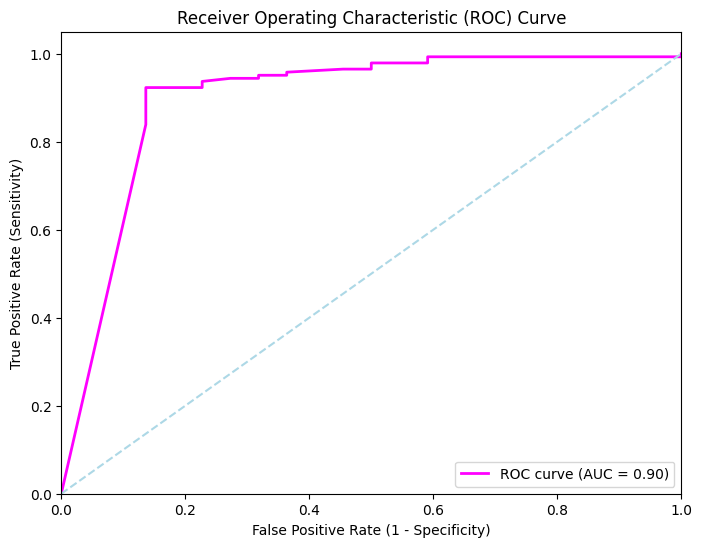

In [22]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='magenta', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Model 1 Conclusion:
After running the initial Logistic regression, it is clear that each of the four non-string columns had a positive impact of the Overall Satisfaction.

Cleanliness and Friendliness were the biggest contributors when determining the OSAT, with coefficients of 1.011495635349904 and 0.9776513507590351, respectively. The Logistic model performed very well and is fitted well, with an AUC score of 0.90. This model has excellent predictive power in estimating whether the customer rated their overall satisfaction as a '5' or not.




### 2. Sentiment Analysis Model for Emotion Detection

This section of the analysis will attempt to predict the emotional tone of customer comments and check if their feelings displayed in their comments match the overall satisfaction rating that they gave.

In [23]:
def preprocess_text(text):
    # Check if the text is a string
    if not isinstance(text, str):
        return ""  # Or return some placeholder text like "missingdata"
    text = text.lower()  # Lowercase text
    text = re.sub(r'\W', ' ', text)  # Remove all special characters
    tokens = word_tokenize(text)  # Tokenize
    # Assuming stopwords and lemmatizer have been downloaded and imported correctly
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

df2['processed_comments'] = df2['Combined OSAT Comments'].apply(preprocess_text)

In [24]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed comments to create a feature matrix
X = vectorizer.fit_transform(df2['processed_comments'])

# Assuming your ratings are stored in a column called 'Overall satisfaction (1-5)'
y = df2['OSAT']

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.87      1.00      0.93       143

    accuracy                           0.87       165
   macro avg       0.17      0.20      0.19       165
weighted avg       0.75      0.87      0.80       165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model 2 Conclusion:
The classification report shows that the model performs well in predicting class 5 (highest satisfaction rating), with high precision, recall, and F1-score. However, it struggles with classes 2 and 3, where the precision, recall, and F1-score are all very low.


## 3. Time Series Analysis for Trend Detection Over Time

A Time Series Analysis was completed to determine whether the OSAT was impacted by time.

Index(['Date', 'OSAT', 'Cleanliness', 'Friendliness', 'TTRO', 'Accuracy',
       'Combined OSAT Comments', 'processed_comments', 'Year', 'Month'],
      dtype='object')


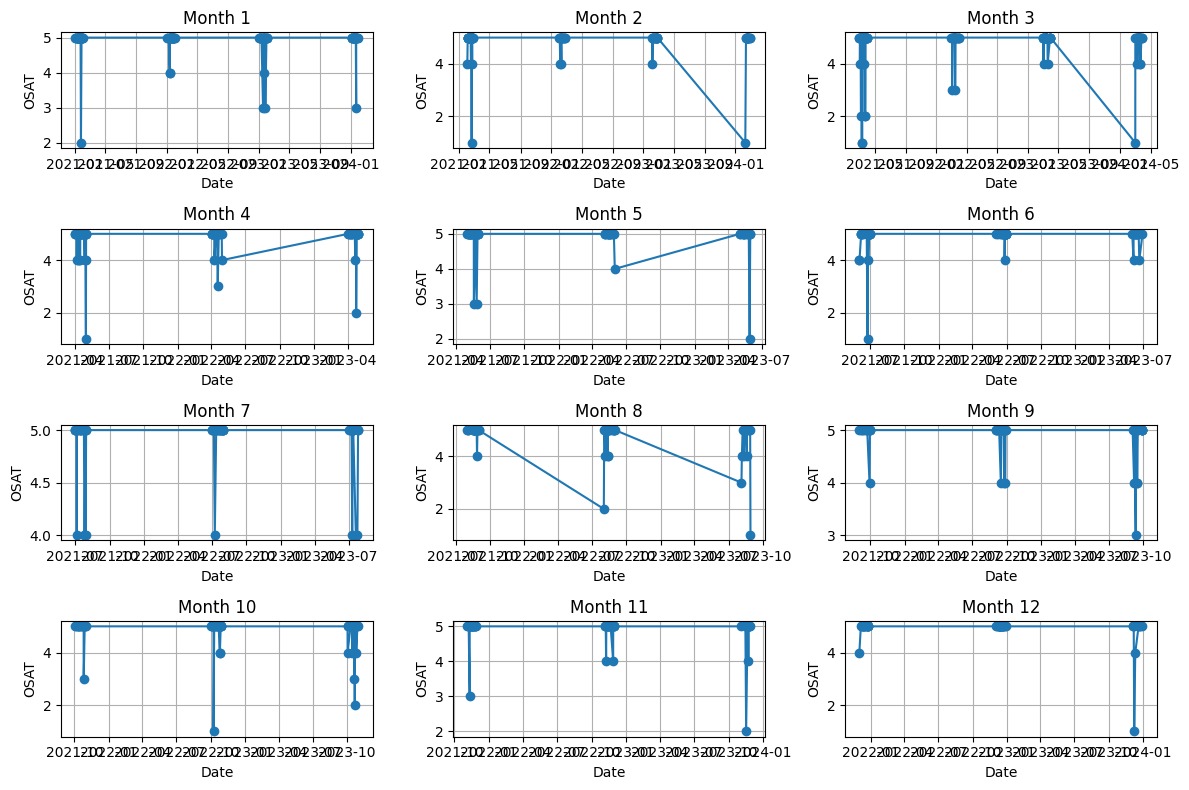

In [26]:

df2['Date'] = pd.to_datetime(df2['Date'])

# Extract year and month from the "Date" column
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
print(df2.columns)
# Create a seasonal subseries plot
plt.figure(figsize=(12, 8))
for i in range(1, 13):
    plt.subplot(4, 3, i)
    plt.plot(df2[df2['Month'] == i]['Date'], df2[df2['Month'] == i]['OSAT'], marker='o', linestyle='-')
    plt.title(f'Month {i}')
    plt.xlabel('Date')
    plt.ylabel('OSAT')
    plt.grid(True)
plt.tight_layout()
plt.savefig('seasonal_subseries_plot.png')

In [27]:
#Time Series Clustering

In [28]:

# Load sample time series data
X_train, y_train, _, _ = CachedDatasets().load_dataset("Trace")

# Scale the time series data
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Initialize TimeSeriesKMeans clustering model
n_clusters = 3
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=42)

# Fit the model to the data
km.fit(X_train)

# Print cluster centers
print("Cluster centers:\n", km.cluster_centers_)

# Predict cluster labels
labels = km.predict(X_train)
print("Cluster labels:\n", labels)


88.128 --> 49.342 --> 47.932 --> 47.508 --> 47.508 --> 
Cluster centers:
 [[[-1.63617379]
  [-1.63488276]
  [-1.63935883]
  [-1.64120748]
  [-1.64478191]
  [-1.63492624]
  [-1.6356067 ]
  [-1.6388409 ]
  [-1.6439502 ]
  [-1.6407368 ]
  [-1.63728713]
  [-1.64164222]
  [-1.63972365]
  [-1.63906206]
  [-1.63650457]
  [-1.6391887 ]
  [-1.64029449]
  [-1.63838725]
  [-1.64144754]
  [-1.63291503]
  [-1.63323827]
  [-1.63910175]
  [-1.64248906]
  [-1.6459633 ]
  [-1.64096364]
  [-1.63848743]
  [-1.64217338]
  [-1.63980115]
  [-1.63962345]
  [-1.63617378]
  [-1.63716425]
  [-1.6396556 ]
  [-1.63709622]
  [-1.63800732]
  [-1.63148601]
  [-1.63255966]
  [-1.6366728 ]
  [-1.6351644 ]
  [-1.62300455]
  [-1.62538245]
  [-1.61355337]
  [-1.62313874]
  [-1.62207455]
  [-1.61133991]
  [-1.60631001]
  [-1.5943883 ]
  [-1.58950204]
  [-1.57704163]
  [-1.56211446]
  [-1.54366578]
  [-1.53407853]
  [-1.51330864]
  [-1.49873873]
  [-1.47731294]
  [-1.44761851]
  [-1.42858576]
  [-1.39298832]
  [-1.35550956

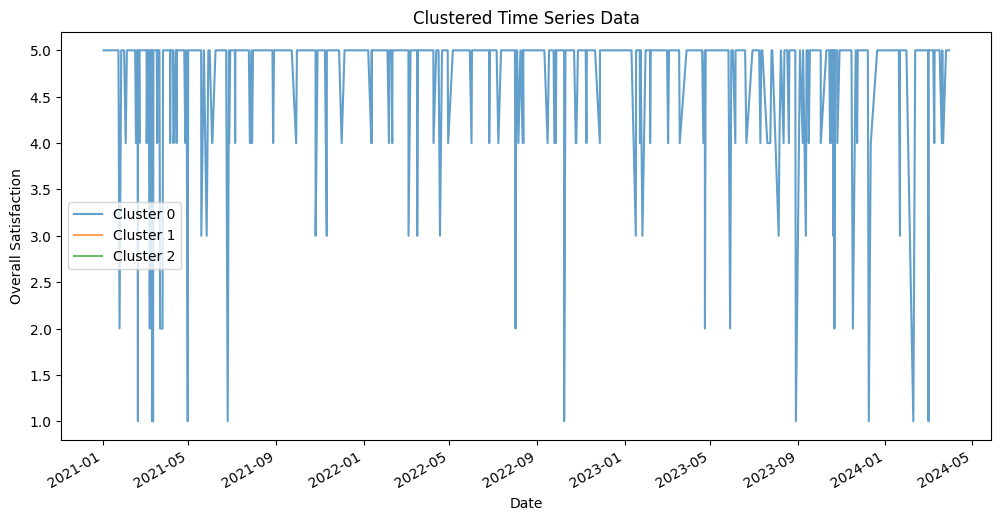

In [29]:
df2['Date'] = pd.to_datetime(df2['Date'])

#Set "Date" column as the index
df2.set_index('Date', inplace=True)

# Sort DataFrame by index (Date)
df2.sort_index(inplace=True)

# Normalize the time series data
scaler = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0)  # Standardize time series
normalized_data = scaler.fit_transform(df2['OSAT'].values.reshape(-1, 1))

# Define the number of clusters
n_clusters = 3

# Apply Time Series K-Means clustering
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42)
cluster_labels = km.fit_predict(normalized_data)

# Add cluster labels to DataFrame
df2['Cluster'] = cluster_labels

# Plot each cluster separately
plt.figure(figsize=(12, 6))
for cluster_label in range(n_clusters):
    cluster_data = df2[df2['Cluster'] == cluster_label]['OSAT']
    cluster_data.plot(label=f'Cluster {cluster_label}', alpha=0.7)

plt.title('Clustered Time Series Data')
plt.xlabel('Date')
plt.ylabel('Overall Satisfaction')
plt.legend()
plt.show()

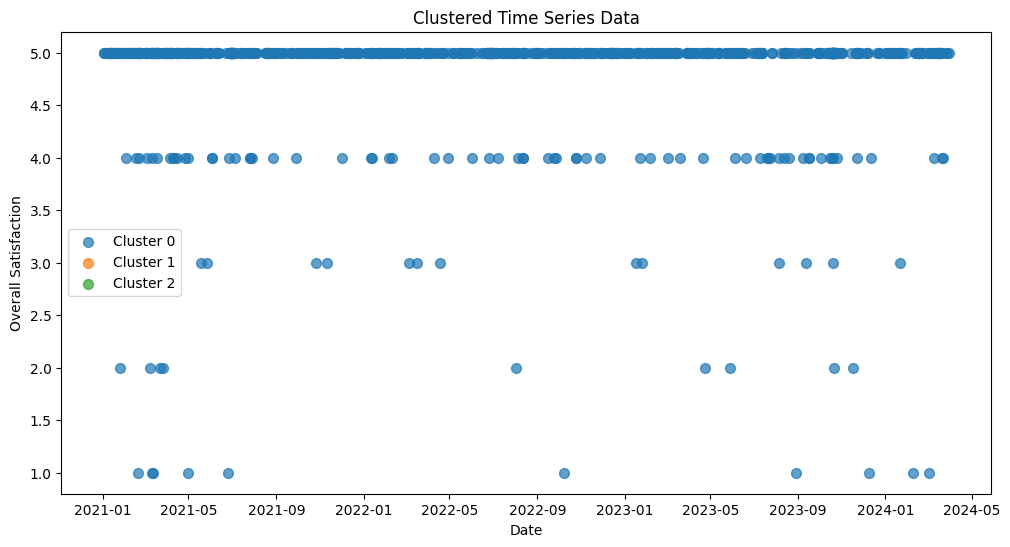

In [30]:
# Plot the clusters
plt.figure(figsize=(12, 6))
for cluster_label in range(n_clusters):
    cluster_data = df2[df2['Cluster'] == cluster_label]
    plt.scatter(cluster_data.index, cluster_data['OSAT'], label=f'Cluster {cluster_label}', alpha=0.7, s=50)

plt.title('Clustered Time Series Data')
plt.xlabel('Date')
plt.ylabel('Overall Satisfaction')
plt.legend()
plt.show()

#### Model 3.1 (Time Series Clustering) Conclusion
By performing time series clustering, we noticed that "5" ratings stayed consistent over time, while there was a spike in lower ratings ("1" and "2") in the first half of 2021 and the second half of 2023.

In [32]:
#Time Series Forecasting (Arima Model)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   OSAT   No. Observations:                  821
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -792.556
Date:                Mon, 22 Apr 2024   AIC                           1591.113
Time:                        01:52:38   BIC                           1605.241
Sample:                             0   HQIC                          1596.534
                                - 821                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0209      0.041     -0.509      0.610      -0.101       0.060
ma.L1         -0.9926      0.006   -158.885      0.000      -1.005      -0.980
sigma2         0.4025      0.006     62.815      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


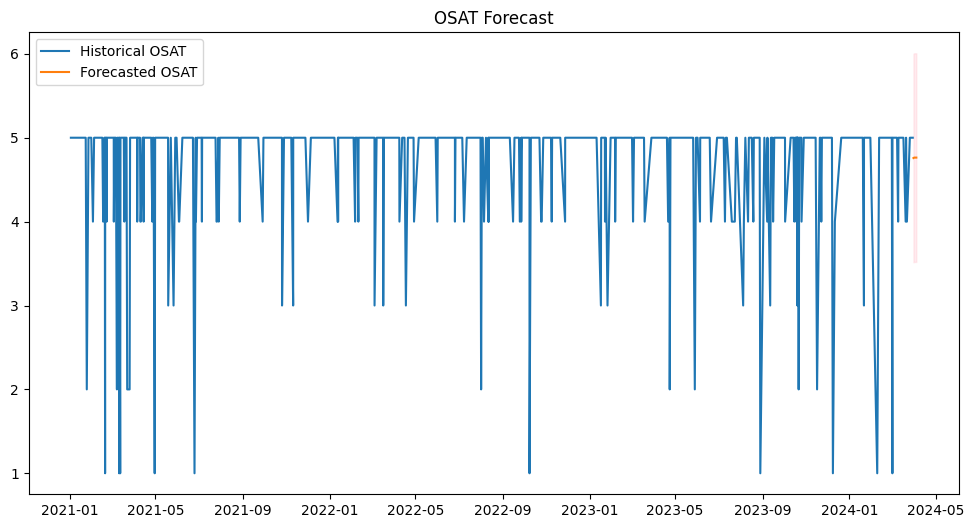

In [33]:

p = 1
d = 1
q = 1

model = ARIMA(df2['OSAT'], order=(p, d, q))
results = model.fit()
print(results.summary())

# Forecasting
forecast = results.get_forecast(steps=5)
forecast_index = pd.date_range(start=df2.index[-1], periods=6, freq='D')[1:]

# Plotting results
plt.figure(figsize=(12,6))
plt.plot(df2.index, df2['OSAT'], label='Historical OSAT')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted OSAT')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('OSAT Forecast')
plt.show()

#### Model 3.2 (Time Series Forecasting)
By performing time series forecasting (ARIMA model), we are able to predict that in the near future, store ratings are likely to be around "4" and "5

# 4. Sentiment Analysis Model for Trend Analysis

Identify broader trends within customer feedback, cluster similar reviews or identify specific products/services mentioned.

In [34]:
# Text preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Lowercase text
        text = re.sub(r'\W', ' ', text)  # Remove special characters
        tokens = word_tokenize(text)  # Tokenize
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
        return ' '.join(tokens)
    else:
        return ''

# Apply text preprocessing to the 'Combined OSAT Comments' column
df2['processed_text'] = df2['Combined OSAT Comments'].apply(preprocess_text)

# Display the first few rows of the processed dataset
print(df2.head())


                     OSAT  Cleanliness  Friendliness  TTRO  Accuracy  \
Date                                                                   
2021-01-02 04:25:00     5          5.0           5.0   5.0       5.0   
2021-01-03 11:41:00     5          5.0           5.0   5.0       5.0   
2021-01-06 09:33:00     5          5.0           5.0   5.0       5.0   
2021-01-07 11:25:00     5          5.0           5.0   5.0       5.0   
2021-01-08 08:12:00     5          5.0           5.0   5.0       5.0   

                                                Combined OSAT Comments  \
Date                                                                     
2021-01-02 04:25:00  Consistently have gone to this Wawa never had ...   
2021-01-03 11:41:00  Everything was clean. Ordering was easy. Staff...   
2021-01-06 09:33:00  The speed of the food deliveryThe cleanliness ...   
2021-01-07 11:25:00  I love going to wawa everyone is so nice and f...   
2021-01-08 08:12:00  The staff is always pleasant a

In [35]:
# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df2['processed_text'])

# Display the shape of the feature matrix
print("Shape of feature matrix:", X.shape)

Shape of feature matrix: (821, 1815)


In [36]:
# Clustering (K-means)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the dataset
df2['cluster'] = kmeans.labels_

# Display the first few rows of the dataset with cluster labels
print(df2.head())

                     OSAT  Cleanliness  Friendliness  TTRO  Accuracy  \
Date                                                                   
2021-01-02 04:25:00     5          5.0           5.0   5.0       5.0   
2021-01-03 11:41:00     5          5.0           5.0   5.0       5.0   
2021-01-06 09:33:00     5          5.0           5.0   5.0       5.0   
2021-01-07 11:25:00     5          5.0           5.0   5.0       5.0   
2021-01-08 08:12:00     5          5.0           5.0   5.0       5.0   

                                                Combined OSAT Comments  \
Date                                                                     
2021-01-02 04:25:00  Consistently have gone to this Wawa never had ...   
2021-01-03 11:41:00  Everything was clean. Ordering was easy. Staff...   
2021-01-06 09:33:00  The speed of the food deliveryThe cleanliness ...   
2021-01-07 11:25:00  I love going to wawa everyone is so nice and f...   
2021-01-08 08:12:00  The staff is always pleasant a

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
# Identify Top Important Words to Predict Satisfaction

In [38]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df2['processed_comments'] = df2['Combined OSAT Comments'].apply(preprocess)

# Vectorization of text data
vectorizer = TfidfVectorizer(max_features=1000, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(df2['processed_comments']).toarray()

# Labels
y = df2['OSAT']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           4       1.00      0.30      0.46        10
           5       0.90      1.00      0.94       145

    accuracy                           0.90       165
   macro avg       0.47      0.33      0.35       165
weighted avg       0.85      0.90      0.86       165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Print Importance for each feature
feature_importances = pd.DataFrame(classifier.feature_importances_, index=vectorizer.get_feature_names_out(), columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(20))


           importance
took         0.031818
little       0.027138
good         0.025458
time         0.023995
like         0.022314
price        0.022107
app          0.021843
could        0.018247
longer       0.017933
say          0.017692
cheese       0.016586
order        0.016561
put          0.015572
cold         0.015470
area         0.015455
quick        0.015268
said         0.014479
item         0.014216
bowl         0.014065
breakfast    0.013510


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


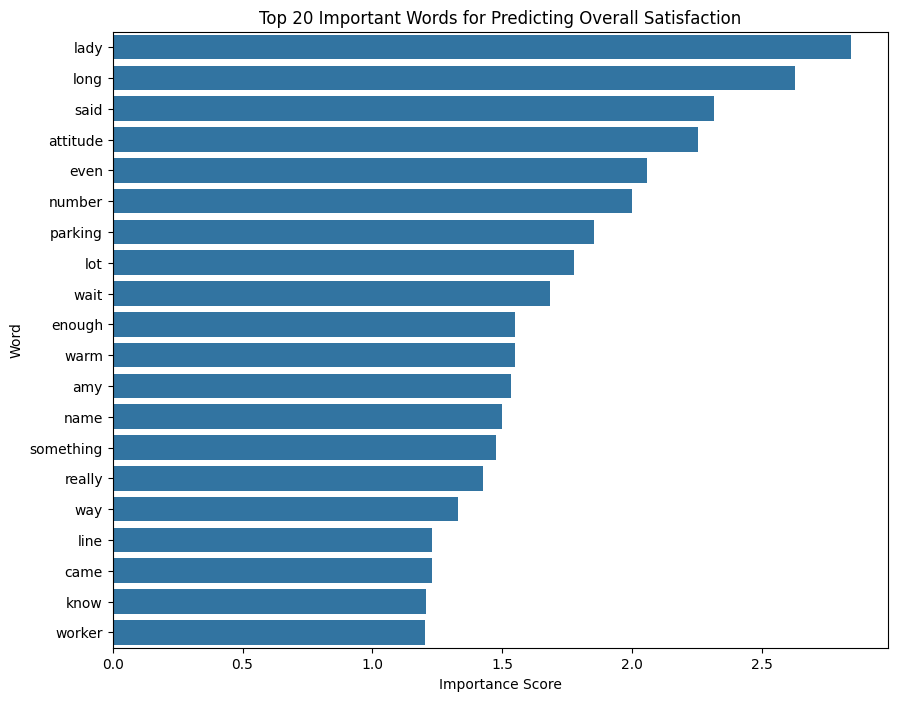

In [41]:
# Preprocess text data: tokenization, removing stopwords, etc.
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df2['processed_comments'] = df2['Combined OSAT Comments'].apply(preprocess)

# Vectorization of text data
vectorizer = TfidfVectorizer(max_features=1000, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(df2['processed_comments']).toarray()

# Labels
y = df2['OSAT']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier model
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Get the coefficients after scaling
scaled_coef = classifier.coef_[0] * vectorizer.idf_

# Create a DataFrame with important words and their importance scores
word_importance_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Importance': scaled_coef
})

# Sort the DataFrame by importance score
word_importance_df = word_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important words and their importance scores
N = 20  # Number of top words to plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Word', data=word_importance_df.head(N))
plt.title('Top {} Important Words for Predicting Overall Satisfaction'.format(N))
plt.xlabel('Importance Score')
plt.ylabel('Word')
plt.show()

#### Model 4.1 (Top Words to Predict Satisfaction) Conclusion
With this model, we are able to determine the importance of each word used in the comments and its significance when predicting Overall Satisfaction (OSAT). The graph above shows that the top three predicting words are: 'Lady,' 'Long,' and 'Said.

In [42]:
# Predict satisfaction rating based on a new comment

In [43]:
# Evaluate the model
accuracy = classifier.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

# Define a function to predict satisfaction rating based on a new comment
def predict_satisfaction(comment):
    # Preprocess and vectorize the comment
    preprocessed_comment = preprocess(comment)
    vectorized_comment = vectorizer.transform([preprocessed_comment]).toarray()

    # Predict using the trained model
    predicted_rating = classifier.predict(vectorized_comment)

    return predicted_rating[0]

# Example Usage:
new_comment = "The service was great and the staff was amazing!"
predicted_rating = predict_satisfaction(new_comment)
print(f"The predicted satisfaction rating is: {predicted_rating}")


Model Accuracy: 0.8909090909090909
The predicted satisfaction rating is: 5


#### Model 4.2 (Rating Prediction Based on Comment) Conclusion
This Model, which had an accuracy of 88%, allows us to predict OveralL Satisfaction (OSAT) based on a new comment, using words of importance.  

## Project Conclusion:

The objective of this project was to analyze customer service metrics from a convenience-style operation serving food and fuel, focusing on understanding the relationship between customer comments and overall satisfaction. Through the completion of four distinct machine learning models, we have gained comprehensive insights into factors that drive customer satisfaction.

#### Factors Influencing Satisfaction:
The Logistic Regression model identified cleanliness and friendliness as the strongest predictors of customer satisfaction, suggesting that operational and interpersonal aspects of the store experience are crucial to customer perceptions.

#### Emotional Tone and Satisfaction Ratings:
The Sentiment Analysis Model for Emotion Detection revealed a strong ability to predict high satisfaction levels (class 5) from customer comments. However, the model showed limitations in accurately identifying middle-range sentiments (classes 2 and 3), indicating potential areas for refinement in understanding nuanced emotional expressions.

#### Trends Over Time:
Our analysis through Time Series methods detected stability in high ratings over time, despite periodic spikes in negative feedback. The ARIMA forecasting suggested an optimistic outlook, with future ratings likely to skew towards the higher end.

#### Trend Analysis and Prediction from Comments:
The Sentiment Analysis Model for Trend Analysis successfully identified key words and phrases that significantly impact satisfaction ratings, like 'Lady,' 'Long,' and 'Said.' This model's ability to predict overall satisfaction from new comments at a high accuracy rate (88%) underscores the predictive power of textual analysis in estimating customer sentiment.

#### Opportunities of future analysis:

The data provided only encompassed one store for analysis. This operation may not represent all customers nor all stores, however it does provide clear insight on the impact of these consumer's perspective. One approach to expand on future analysis would be to include multiple stores across the organization.

Another opportunity for project growth would be to gather demographics about the customers that took the survey to gain insight on how customers of different race, ethnicity, age, gender, etc. value the aspects explored in this project.
